In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Datasets/titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [4]:
df.isna().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [5]:
X = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
Age_mean = X_train['Age'].mean()
Age_median = X_train['Age'].median()

Fare_mean = X_train['Fare'].mean()
Fare_median = X_train['Fare'].median()

In [9]:
X_train['Age_mean'] = X_train['Age'].fillna(Age_mean)
X_train['Age_median'] = X_train['Age'].fillna(Age_median)
X_train['Fare_mean'] = X_train['Fare'].fillna(Fare_mean)
X_train['Fare_median'] = X_train['Fare'].fillna(Fare_median)

In [10]:
X_train

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
331,45.5,28.5000,0,45.500000,45.5,28.500000,28.5000
733,23.0,13.0000,0,23.000000,23.0,13.000000,13.0000
382,32.0,7.9250,0,32.000000,32.0,7.925000,7.9250
704,26.0,7.8542,1,26.000000,26.0,7.854200,7.8542
813,6.0,31.2750,6,6.000000,6.0,31.275000,31.2750
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0,7.650000,7.6500
270,NaN,31.0000,0,29.498846,28.0,31.000000,31.0000
860,41.0,NaN,2,41.000000,41.0,32.517788,14.4000
435,14.0,120.0000,3,14.000000,14.0,120.000000,120.0000


After doing the imputation we should check for the variance 

In [13]:
print("The Original Age Variance",X_train['Age'].var())
print("The Age Variance After Mean Imputation ",X_train['Age_mean'].var())
print("The Age Variance After the Median Imputation ",X_train['Age_median'].var())
print("The Original Fare Variance ",X_train['Fare'].var())
print("The Fare Variance After Mean Imputation ",X_train['Fare_mean'].var())
print("The Fare Variance After Median Imputation ",X_train['Fare_median'].var())

The Original Age Variance 210.2517072477438
The Age Variance After Mean Imputation  168.8519336687225
The Age Variance After the Median Imputation  169.20731007048096
The Original Fare Variance  2761.031434948639
The Fare Variance After Mean Imputation  2621.2323749512393
The Fare Variance After Median Imputation  2637.01248167777


# Change in distribution 

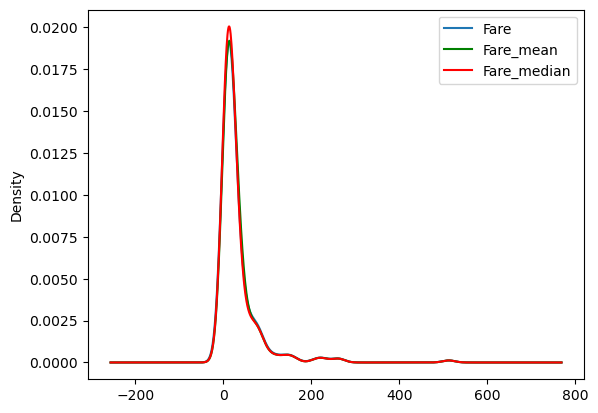

In [24]:
fig = plt.figure()
ax = plt.subplot(111)

X_train['Fare'].plot(kind='kde',ax=ax)

X_train['Fare_mean'].plot(kind='kde',color='green')
X_train['Fare_median'].plot(kind='kde',color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

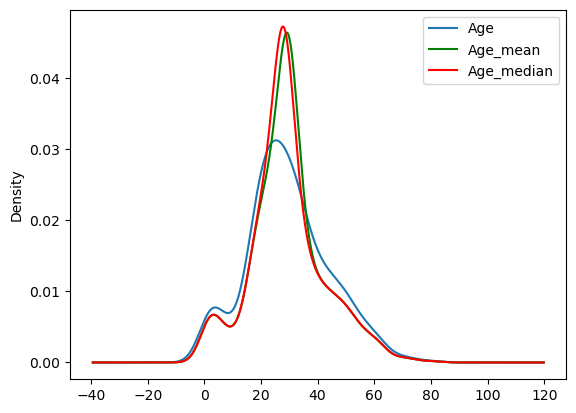

In [25]:
fig = plt.figure()
ax = plt.subplot(111)

X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_mean'].plot(kind='kde',color='green')
X_train['Age_median'].plot(kind='kde',color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [32]:
X_train.cov()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,71.193767,70.082085
Fare,75.481375,2761.031435,18.599163,60.224654,63.938058,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.616299,-5.587710,17.657433,17.672035
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,57.175304,56.282518
Age_median,210.251707,63.938058,-5.587710,168.851934,169.207310,60.700688,59.728510
Fare_mean,71.193767,2761.031435,17.657433,57.175304,60.700688,2621.232375,2621.232375
Fare_median,70.082085,2761.031435,17.672035,56.282518,59.728510,2621.232375,2637.012482


In [33]:
X_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_mean,Fare_median
Age,1.000000,0.091482,-0.319651,1.000000,1.000000,0.088944,0.087232
Fare,0.091482,1.000000,0.207193,0.088151,0.093496,1.000000,1.000000
Family,-0.319651,0.207193,1.000000,-0.256883,-0.255307,0.204981,0.204536
Age_mean,1.000000,0.088151,-0.256883,1.000000,0.998949,0.085941,0.084346
Age_median,1.000000,0.093496,-0.255307,0.998949,1.000000,0.091145,0.089416
Fare_mean,0.088944,1.000000,0.204981,0.085941,0.091145,1.000000,0.997003
Fare_median,0.087232,1.000000,0.204536,0.084346,0.089416,0.997003,1.000000


<AxesSubplot:>

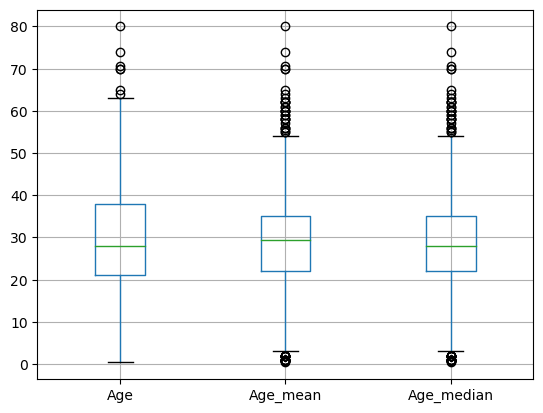

In [34]:
X_train[['Age','Age_mean','Age_median']].boxplot()

<AxesSubplot:>

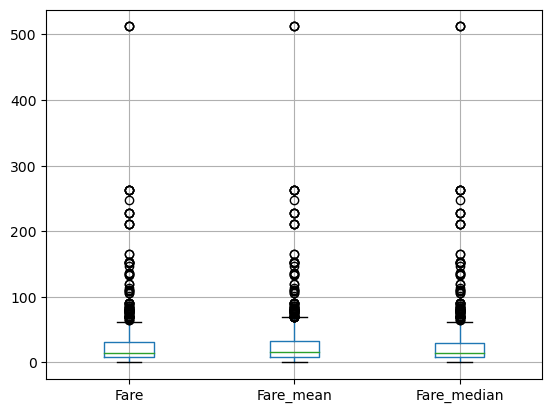

In [35]:
X_train[['Fare','Fare_mean','Fare_median']].boxplot()

# Using The Scikit-Learn

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [37]:
from sklearn.impute import SimpleImputer

In [38]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [43]:
from sklearn.compose import ColumnTransformer
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [44]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [45]:
X_train= trf.transform(X_train)
X_test = trf.transform(X_test)